In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import folium

import networkx as nx
import math

import numpy as np

import tqdm

In [2]:
START = [51.10496699999999, 3.267232100000001]
EIND = [51.1555012, 3.236637900000005]

STOPS = [
    [51.1458, 3.2521],
    [51.1372, 3.2569],
    [51.1354, 3.2386],
    [51.1370, 3.2794],
    [51.1307, 3.2688],
    [51.1298, 3.2566],
    [51.1292, 3.2473],
    [51.1205, 3.2382],
    [51.1132, 3.2786]
]

m = folium.Map(location=START, zoom_start=11)

folium.Marker(START, popup='Begin', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(EIND, popup='Einde', icon=folium.Icon(color='red')).add_to(m)
for stop_nr, stop in enumerate(STOPS):
    folium.Marker(stop, popup='STOP_{}'.format(stop_nr), icon=folium.Icon(color='blue')).add_to(m)

m

In [3]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

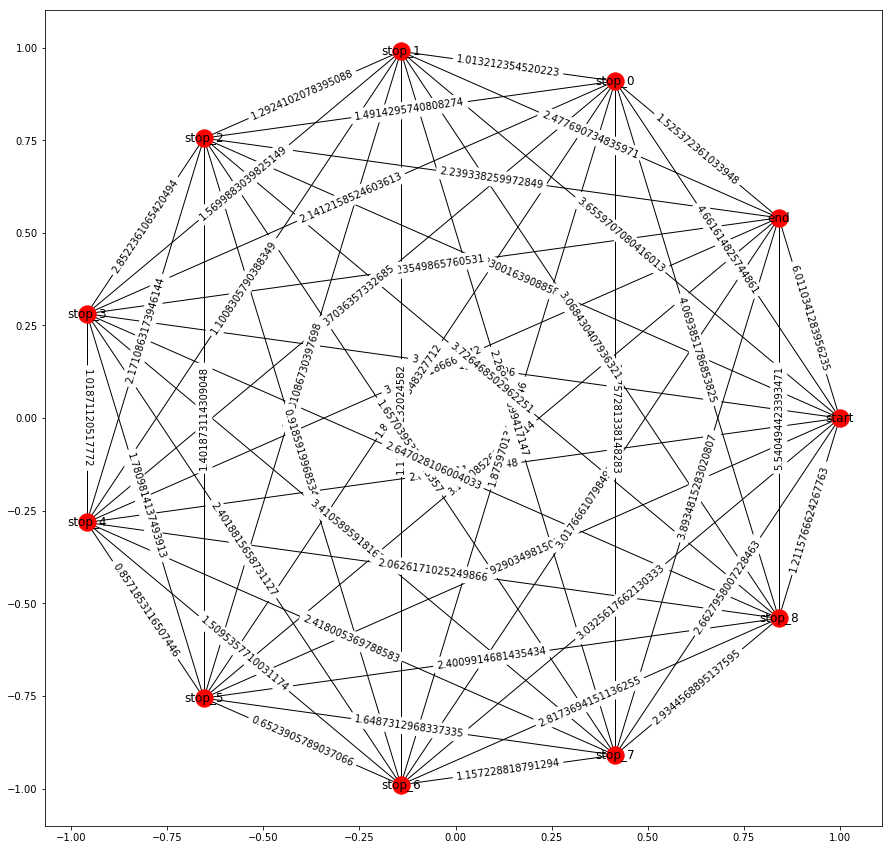

 84%|████████▍ | 827407/986410 [00:09<00:01, 83182.69it/s]/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 986410/986410 [00:11<00:00, 83246.09it/s]


In [7]:
G = nx.Graph()

G.add_edge('start', 'end', weight=distance(START, EIND))

for stop_nr, stop in enumerate(STOPS):
    G.add_edge('stop_{}'.format(stop_nr), 'end', weight=distance(stop, EIND))

for stop_nr, stop in enumerate(STOPS):
    G.add_edge('start', 'stop_{}'.format(stop_nr), weight=distance(START, stop))
    
for stop_nr1, stop1 in enumerate(STOPS):
    for stop_nr2, stop2 in enumerate(STOPS):
        if stop1 != stop2:
            G.add_edge('stop_{}'.format(stop_nr1), 'stop_{}'.format(stop_nr2) , weight=distance(stop1, stop2))
    
    
plt.figure(figsize=(15,15))
layout = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout)
nx.draw_networkx_labels(G, pos=layout)
labels = {}
for edge in G.edges():
    labels[edge] = nx.get_edge_attributes(G, 'weight')[edge]
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

all_weights = nx.get_edge_attributes(G, 'weight')
def cost(path):
    total = 0
    for i in range(len(path) - 1):
        if (path[i], path[i+1]) in all_weights:
            total += all_weights[(path[i], path[i+1])]
        else:
            total += all_weights[(path[i+1], path[i])]
    return total

kappa = 0.5
base_dist = nx.get_edge_attributes(G, 'weight')[('start', 'end')]
max_dist = (1 + kappa) * base_dist 

length = len(list(nx.all_simple_paths(G, 'start', 'end')))

best_path = None
max_len = 0
for path in tqdm.tqdm(nx.all_simple_paths(G, 'start', 'end'), total=length):
    if cost(path) < max_dist:
        if len(path) > max_len:
            max_len = len(path)
            best_path = path

In [8]:
print(best_path, cost(best_path))
stop_idx = [int(x.split('_')[1]) for x in best_path[1:-1]]

['start', 'stop_7', 'stop_6', 'stop_5', 'stop_4', 'stop_1', 'stop_0', 'end'] 8.969015804661598


In [9]:
START = [51.10496699999999, 3.267232100000001]
EIND = [51.1555012, 3.236637900000005]

STOPS = [
    [51.1458, 3.2521],
    [51.1372, 3.2569],
    [51.1354, 3.2386],
    [51.1370, 3.2794],
    [51.1307, 3.2688],
    [51.1298, 3.2566],
    [51.1292, 3.2473],
    [51.1205, 3.2382],
    [51.1132, 3.2786]
]

m = folium.Map(location=START, zoom_start=11)

folium.Marker(START, popup='Begin', icon=folium.Icon(color='green')).add_to(m)
folium.Marker(EIND, popup='Einde', icon=folium.Icon(color='red')).add_to(m)
for stop in STOPS:
    folium.Marker(stop, popup='STOP', icon=folium.Icon(color='blue')).add_to(m)
    
folium.PolyLine([START, STOPS[stop_idx[0]]]).add_to(m)
for i in range(len(stop_idx) - 1):
    folium.PolyLine([STOPS[stop_idx[i]], STOPS[stop_idx[i+1]]]).add_to(m)
folium.PolyLine([STOPS[stop_idx[-1]], EIND]).add_to(m)
    
m